### Data Understanding

### Import libraries

In [1]:
import numpy as np
import seaborn as sns
import re
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

### Raw train set: 1.6 M rows × 6 columns

In [2]:
columns = ['polarity', 'id', 'date', 'query_type', 'user', 'text']

train_raw = pd.read_csv('training.1600000.processed.noemoticon.csv',
                      header = None,
                      names = columns,
                      encoding ='ISO-8859-1')

In [3]:
train_raw

,polarity,id,date,query_type,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
train_raw.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [5]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
polarity      1600000 non-null int64
id            1600000 non-null int64
date          1600000 non-null object
query_type    1600000 non-null object
user          1600000 non-null object
text          1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
#missing values check
train_raw.isnull().values.any()

False

In [7]:
print(" Number of tweets in the training set: ", len(train_raw))

 Number of tweets in the training set:  1600000


In [8]:
train_raw.columns

Index(['polarity', 'id', 'date', 'query_type', 'user', 'text'], dtype='object')

#### in the training set polarity takes value 0 or 4 (no neautral tweets)

In [9]:
train_raw.polarity.unique()

array([0, 4], dtype=int64)

In [10]:
train_raw.polarity.value_counts()

4    800000
0    800000
Name: polarity, dtype: int64

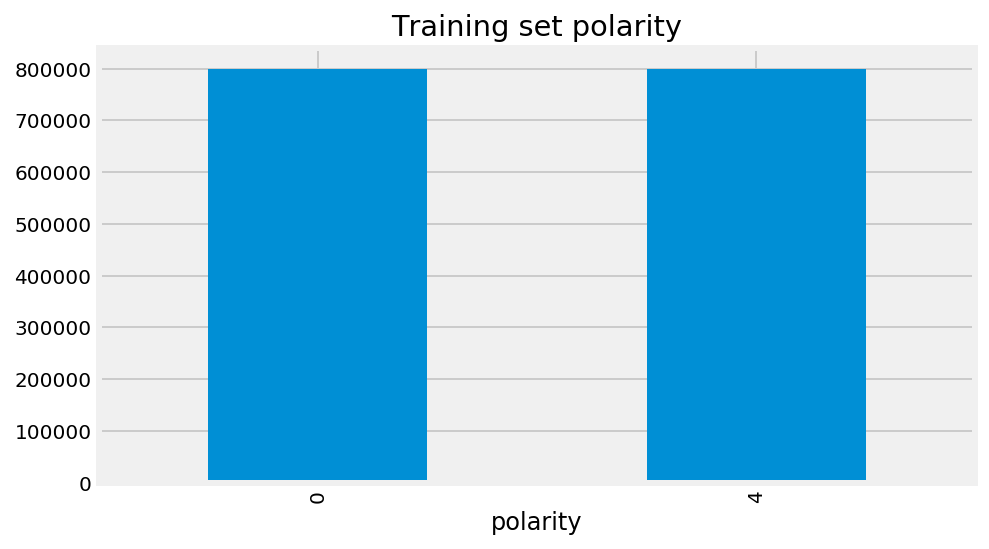

In [11]:
train_raw.groupby('polarity').size().plot(kind='bar', title='Training set polarity')
plt.savefig('train_polarity.png')
plt.show()

In [12]:
train_raw.query_type.unique()

array(['NO_QUERY'], dtype=object)

In [13]:
train_raw.query_type.value_counts()

NO_QUERY    1600000
Name: query_type, dtype: int64

### Drop useless columns. The new train set contains only attributes `text` and `polarity`

In [14]:
train = train_raw[['text', 'polarity']]
train.head()

,text,polarity
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [15]:
train[train.polarity == 4].head(10)

,text,polarity
800000,I LOVE @Health4UandPets u guys r the best!!,4
800001,im meeting up with one of my besties tonight! ...,4
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",4
800003,Being sick can be really cheap when it hurts t...,4
800004,@LovesBrooklyn2 he has that effect on everyone,4
800005,@ProductOfFear You can tell him that I just bu...,4
800006,@r_keith_hill Thans for your response. Ihad al...,4
800007,"@KeepinUpWKris I am so jealous, hope you had a...",4
800008,"@tommcfly ah, congrats mr fletcher for finally...",4
800009,@e4VoIP I RESPONDED Stupid cat is helping me ...,4


In [16]:
train[train.polarity == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            799990, 799991, 799992, 799993, 799994, 799995, 799996, 799997,
            799998, 799999],
           dtype='int64', length=800000)

In [17]:
train[train.polarity == 4].index

Int64Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,
             800007,  800008,  800009,
            ...
            1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996,
            1599997, 1599998, 1599999],
           dtype='int64', length=800000)

#### length of the tweets (140 char max)

In [21]:
train['text'].max()

'ï¿½ï¿½ï¿½ï¿½ï¿½ß§ï¿½Ç¿ï¿½ï¿½ï¿½ï¿½ï¿½Ð¶ï¿½Ø\x9cï¿½ï¿½ï¿½ &lt;&lt;----I DID NOT KNOW I CUD or HOW TO DO ALL DAT ON MY PHONE TIL NOW. WOW..MY LIFE IS NOW COMPLETE.  JK.'

In [24]:
pd.options.mode.chained_assignment = None 

In [25]:
train['text_len'] = [len(t) for t in train.text]

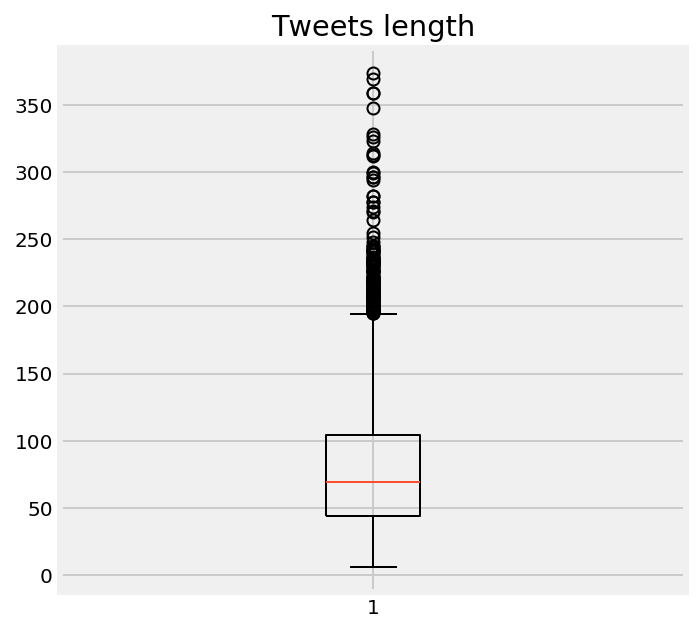

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train.text_len)
ax.set_title('Tweets length')
plt.savefig('tweet_length_boxplot.png',bbox_inches="tight")
plt.show()

In [27]:
train['text_len'].describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_len, dtype: float64

In [32]:
train[train.text_len > 140 ].count()

text        17174
polarity    17174
text_len    17174
dtype: int64

### 17.174 tweet > 140

In [34]:
train[train.text_len > 140 ].max()

text        ï¿½ï¿½ï¿½ï¿½ï¿½ß§ï¿½Ç¿ï¿½ï¿½ï¿½ï¿½ï¿½Ð¶ï¿½Øï¿...
polarity                                                    4
text_len                                                  374
dtype: object

In [36]:
train[train.text_len > 140 ].head(20)

,text,polarity,text_len
213,Awwh babs... you look so sad underneith that s...,0,142
226,Tuesdayï¿½ll start with reflection ï¿½n then a...,0,141
279,Whinging. My client&amp;boss don't understand ...,0,145
343,@TheLeagueSF Not Fun &amp; Furious? The new ma...,0,145
400,#3 woke up and was having an accident - &quot;...,0,144
464,"My bathtub drain is fired: it haz 1 job 2 do, ...",0,146
492,"pears &amp; Brie, bottle of Cabernet, and &quo...",0,150
747,Have an invite for &quot;Healthy Dining&quot; ...,0,141
957,Damnit I was really digging this season of Rea...,0,141
1064,Why do I keep looking...I know that what I rea...,0,141


### Raw test set: 498 rows × 6 columns

In [40]:
columns = ['polarity', 'id', 'date', 'query_type', 'user', 'text']

test_raw = pd.read_csv('testdata.manual.2009.06.14.csv',
                     header = None,
                     names = columns,
                     encoding ='ISO-8859-1')

In [41]:
test_raw

,polarity,id,date,query_type,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [42]:
#missing values check
test_raw.isnull().values.any()

False

In [43]:
print("Number of tweets in the test set: ",len(test_raw))

Number of tweets in the test set:  498


In [44]:
test_raw.columns

Index(['polarity', 'id', 'date', 'query_type', 'user', 'text'], dtype='object')

In [45]:
test_raw.polarity.unique()

array([4, 0, 2], dtype=int64)

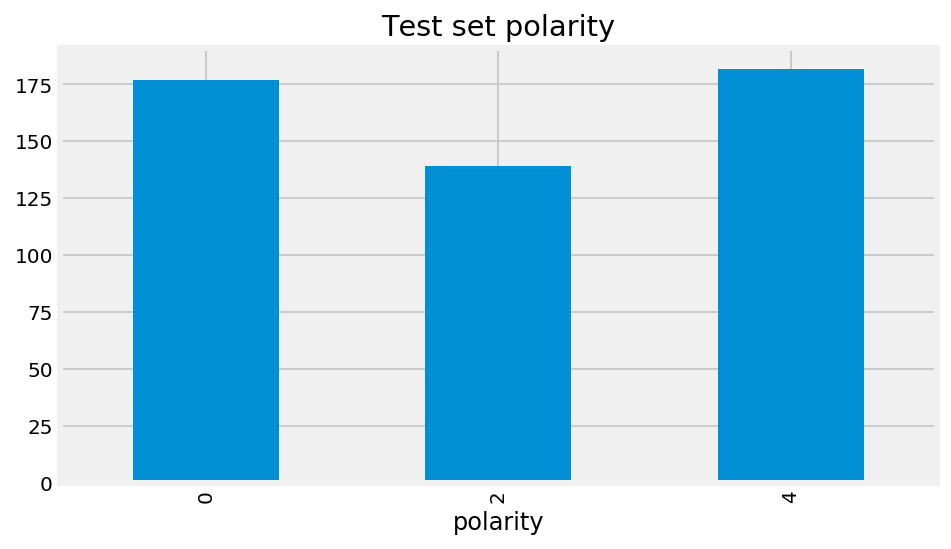

In [46]:
test_raw.groupby('polarity').size().plot(kind='bar', title='Test set polarity')
plt.savefig('test_polarity.png')
plt.show()

In [47]:
test_raw.query_type.unique()

array(['kindle2', 'aig', 'jquery', 'twitter', 'obama', 'nike', 'lebron',
       'iphone app', 'visa', 'fredwilson', '"booz allen"', '40d',
       'google', 'itchy', 'stanford', 'lyx', 'Danny Gokey', 'sleep',
       'san francisco', 'star trek', 'Malcolm Gladwell', 'espn',
       '"twitter api"', 'yahoo', 'scrapbooking', 'wolfram alpha', 'weka',
       '50d', 'lambda calculus', 'east palo alto', 'lakers',
       'north korea', 'pelosi', 'bailout', 'insects', 'mcdonalds', 'exam',
       'cheney', 'republican', 'twitter api', 'jquery book',
       'goodby silverstein', 'wieden', 'g2', 'googleio',
       'viral marketing', '"night at the museum"', 'gm', 'time warner',
       'china', 'surgery', 'dentist', 'baseball', 'sony', 'safeway',
       'eating', 'warren buffet', 'notre dame school', 'federer',
       '"naive bayes"', 'car warranty call', 'at&t', 'wave sandbox',
       'bing', 'summize', 'world cup', 'world cup 2010', 'fred wilson',
       'indian election', 'india election', 'comcas

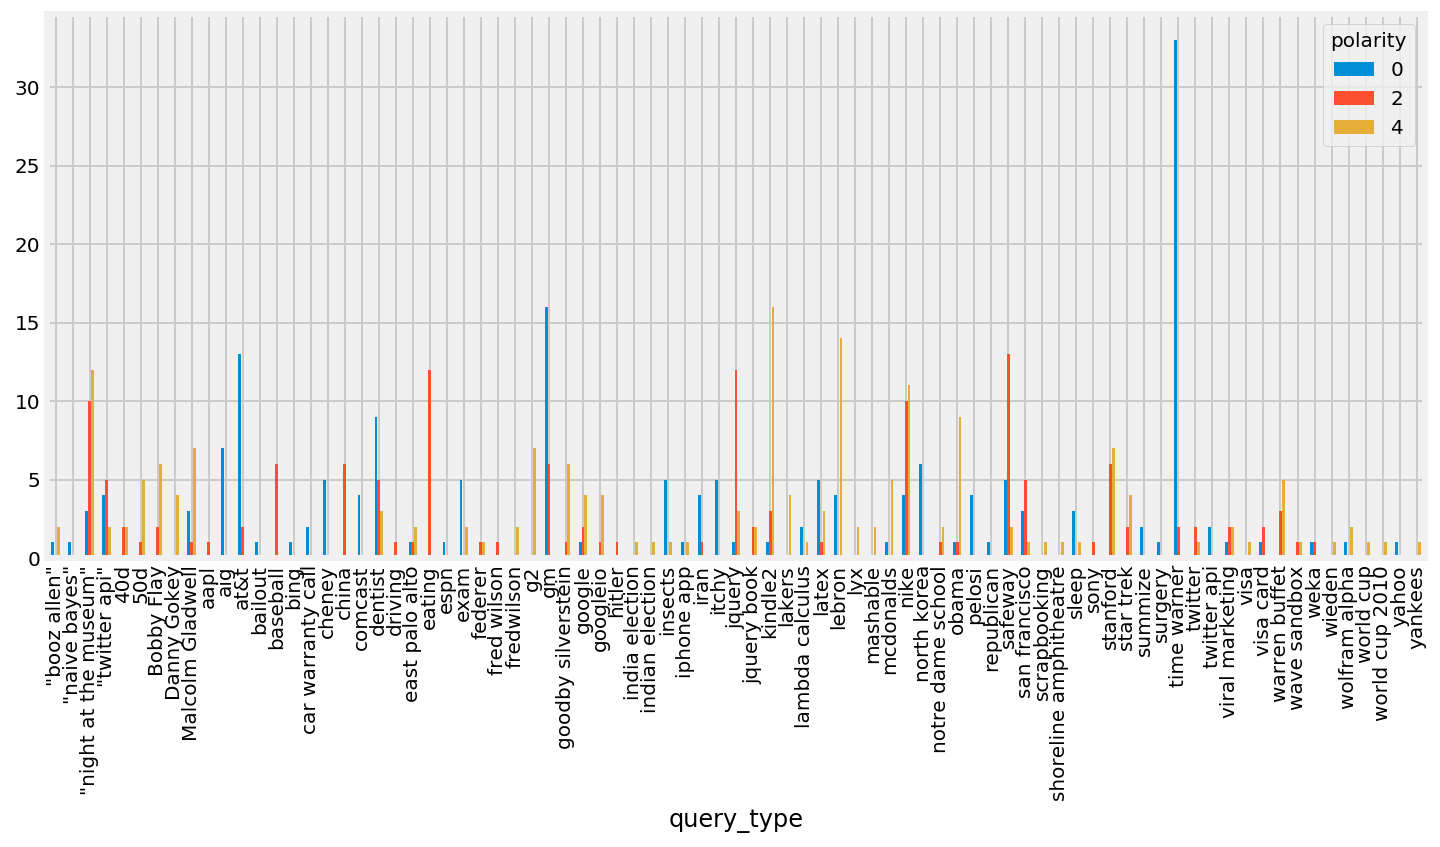

In [48]:
test_raw.groupby(['query_type', 'polarity']).size().unstack().plot(kind='bar',figsize=(11, 5))
plt.show()

### Drop useless columns. The new test set contains only attributes `text` and `polarity`

In [50]:
columns = ['polarity', 'id', 'date', 'query_type', 'user', 'text']

test = pd.read_csv('testdata.manual.2009.06.14.csv',
                     header = None, 
                     usecols = [0,5], 
                     names=columns,
                     encoding ='ISO-8859-1')

In [52]:
test.head()

,polarity,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
polarity    498 non-null int64
text        498 non-null object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
